In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def test_edges(tres = 0.001,nbins = 1000):
    test = np.linspace(0+tres/2,tres*nbins-tres/2,nbins)
    print('texp',test[-1]-test[0])
    print('texp_rounded',np.round(nbins*tres,
                decimals=int(abs(math.log10(tres/1000)))))
    print('tres',test[1]-test[0],test[2]-test[1])
    print('tres_median',np.double(np.median(np.ediff1d(test))))
    print('first_bin',test[0])
    print('last_bin',test[-1])
    print('='*72)

In [3]:
for i in [1000,200,4536]:
    test_edges(tres=0.01,nbins=i)

texp 9.989999999999998
texp_rounded 10.0
tres 0.009999999999999998 0.009999999999999998
tres_median 0.009999999999999787
first_bin 0.005
last_bin 9.995
texp 1.9900000000000002
texp_rounded 2.0
tres 0.009999999999999998 0.010000000000000002
tres_median 0.010000000000000009
first_bin 0.005
last_bin 1.995
texp 45.349999999999994
texp_rounded 45.36
tres 0.009999999999999998 0.009999999999999998
tres_median 0.009999999999999787
first_bin 0.005
last_bin 45.355


In [4]:
n_bins=5000
tres = 0.01
time_seg = 10

In [5]:
seg_bins = int(time_seg/tres)
print(seg_bins)
n_segs = int(n_bins/seg_bins)
print(n_segs)
n_segs2 = int(n_bins*tres/time_seg)
print(n_segs2)

1000
5
5


In [6]:
1e+6

1000000.0

In [7]:
test_indices = [i*seg_bins for i in range(1,n_segs+1)]
print(test_indices)

[1000, 2000, 3000, 4000, 5000]


In [8]:
tres = 0.01
nbins = 5000
time_bins_center = np.linspace(0+tres/2.,nbins*tres-tres/2.,nbins,dtype=np.double)

In [9]:
for i in [1,3,5]:
    n = i*(math.log10(time_bins_center[-1]/time_bins_center[0]))
    print(i*(math.log10(time_bins_center[-1]/time_bins_center[0])))
    print(time_bins_center[0]*10**(n/i),time_bins_center[0]*10**(n/i)-time_bins_center[0])

3.9999565683801923
49.99499999999998 49.98999999999998
11.999869705140577
49.99499999999998 49.98999999999998
19.999782841900963
49.995000000000026 49.99000000000002


In [10]:
def make_log_grid(start,stop,rf=30):
    step = start
    log_grid = [step]
    while step <= stop:
        step *= 10**(1/rf)
        log_grid += [step]
    return log_grid

In [11]:
for i in [25]:
    grid=make_log_grid(time_bins_center[0],time_bins_center[-1],rf=i)
    print('rf',i,'--->',len(grid))
    print(grid)
    print('='*72)

rf 25 ---> 101
[0.005, 0.005482390980715925, 0.006011322173087065, 0.0065912836927820365, 0.007227198853729639, 0.007924465962305569, 0.00868900414374688, 0.009527303589816238, 0.010446480654270202, 0.01145433826383887, 0.012559432157547908, 0.01377114351669084, 0.01509975860201009, 0.016556556074129567, 0.018153902738505083, 0.01990535852767488, 0.02182579161200832, 0.023931504616131943, 0.02624037301248866, 0.02877199686685788, 0.0315478672240097, 0.03459154854594687, 0.03792887875145924, 0.04158818855513361, 0.04560054196779555, 0.05000000000000008, 0.05482390980715934, 0.060113221730870754, 0.06591283692782048, 0.07227198853729651, 0.07924465962305582, 0.08689004143746894, 0.09527303589816255, 0.1044648065427022, 0.11454338263838891, 0.12559432157547928, 0.13771143516690865, 0.1509975860201012, 0.16556556074129597, 0.18153902738505115, 0.19905358527674916, 0.21825791612008358, 0.23931504616131985, 0.26240373012488705, 0.2877199686685793, 0.31547867224009757, 0.3459154854594693, 0.3

In [12]:
import sys
sys.path.append('/Volumes/Samsung_T5/saturnx/')
import saturnx as sx
from  saturnx.utils.time_series import rebin_binned_arrays as rebin

In [20]:
test,a = rebin(time_bins_center,rf=-50)

log_rebin
Done!


log_rebin
Done!
<class 'numpy.ndarray'> 4 rf: -1
log_rebin
Done!
<class 'numpy.ndarray'> 17 rf: -5
log_rebin
Done!
<class 'numpy.ndarray'> 32 rf: -10
log_rebin
Done!
<class 'numpy.ndarray'> 74 rf: -25
log_rebin
Done!
<class 'numpy.ndarray'> 133 rf: -50


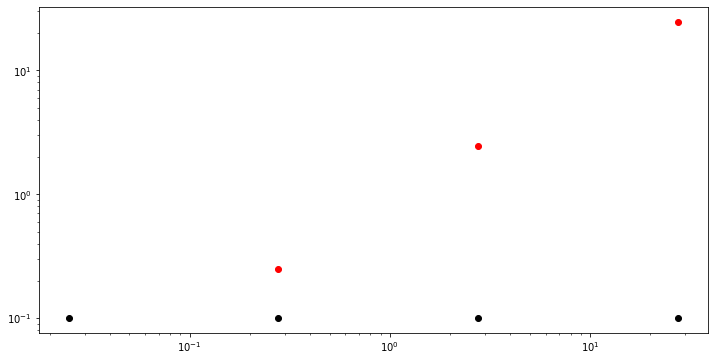

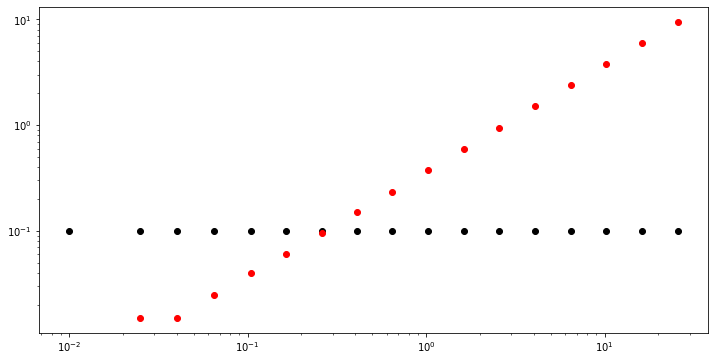

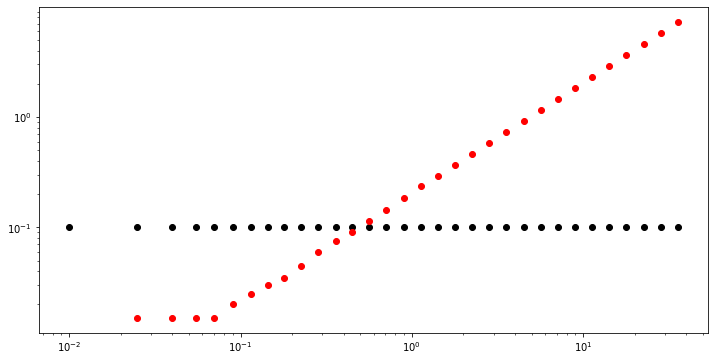

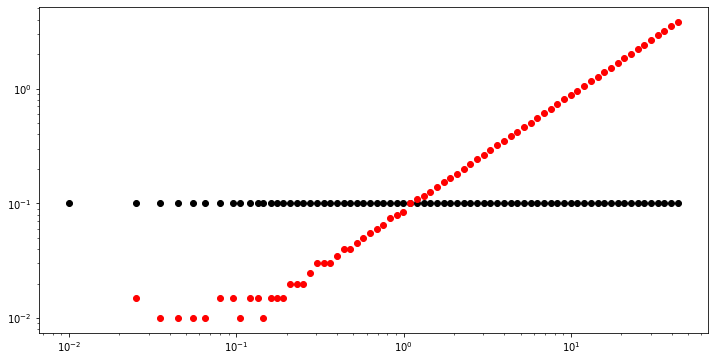

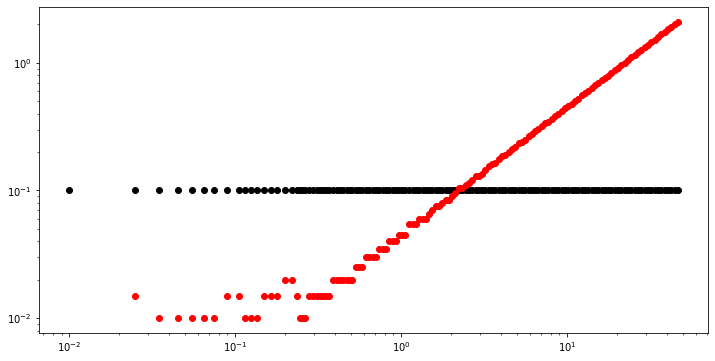

In [31]:
for rf in [-1,-5,-10,-25,-50]:
    test,a = rebin(time_bins_center,rf=rf)
    print(type(test),len(test),'rf:',rf)
    #print(test)
    test2 = np.ediff1d(test)
    fix, ax = plt.subplots(figsize=(12,6))
    ax.plot(test,np.ones(len(test))*0.1,'ok')
    ax.plot(test,np.append(np.array([0]),test2),'or')
    ax.set_xscale('log')
    ax.set_yscale('log')